# Model - B Feed Forward Network with ReLU activation function with Adam Optimizer with 3 hidden layers

Name: Hrishikesh P

Roll No: AM.EN.U4CSE19024

Class: S5 CSE-A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od

In [2]:
dataset_url = 'https://www.kaggle.com/omeret/not-safe-for-work'

In [3]:
!pip install jovian opendatasets --upgrade --quiet
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./not-safe-for-work" (use force=True to force download)


In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.transforms as transforms

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
data_dir = './not-safe-for-work'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['nsfw', 'sfw']


In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [9]:
transform = transforms.Compose([

    transforms.Resize(256),
    transforms.CenterCrop(256),

    transforms.ToTensor(),
])

In [10]:
trainset = ImageFolder(data_dir+'/train', transform=transform)
testset = ImageFolder(data_dir+'/test', transform=transform)

In [21]:
trainset_subset1 = torch.utils.data.Subset(trainset, np.random.choice(len(trainset), 5000, replace=False))
testset_subset1 = torch.utils.data.Subset(testset, np.random.choice(len(testset), 1000, replace=False))

In [22]:
img, label = trainset_subset1[0]
print(img.shape, label)
img

torch.Size([3, 256, 256]) 0


tensor([[[0.8392, 0.8588, 0.8824,  ..., 0.0353, 0.0314, 0.3020],
         [0.8431, 0.8627, 0.8941,  ..., 0.0353, 0.0353, 0.3176],
         [0.8431, 0.8627, 0.8902,  ..., 0.0314, 0.0392, 0.3333],
         ...,
         [0.7098, 0.7255, 0.7294,  ..., 0.8431, 0.8471, 0.8471],
         [0.7176, 0.7451, 0.7294,  ..., 0.8471, 0.8549, 0.8549],
         [0.7373, 0.7686, 0.7529,  ..., 0.8471, 0.8431, 0.8471]],

        [[0.8667, 0.8863, 0.9176,  ..., 0.0627, 0.0588, 0.3020],
         [0.8706, 0.8902, 0.9255,  ..., 0.0627, 0.0667, 0.3176],
         [0.8745, 0.8941, 0.9216,  ..., 0.0667, 0.0706, 0.3373],
         ...,
         [0.6980, 0.7137, 0.7216,  ..., 0.8392, 0.8353, 0.8353],
         [0.7020, 0.7333, 0.7216,  ..., 0.8431, 0.8431, 0.8392],
         [0.7294, 0.7569, 0.7490,  ..., 0.8392, 0.8314, 0.8353]],

        [[0.9059, 0.9294, 0.9569,  ..., 0.0588, 0.0471, 0.2667],
         [0.9098, 0.9333, 0.9608,  ..., 0.0627, 0.0510, 0.2863],
         [0.9137, 0.9333, 0.9529,  ..., 0.0549, 0.0510, 0.

In [23]:
input_size = 65536*3
hidden_size = 100 
num_classes = 2
num_epochs = 15
batch_size = 16
learning_rate = 0.001 

In [24]:
train_loader1 = torch.utils.data.DataLoader(
    dataset=trainset_subset1,
    batch_size=batch_size,
    shuffle=False  
)

In [25]:
test_loader1 = torch.utils.data.DataLoader(
    dataset=testset_subset1,
    batch_size=batch_size,
    shuffle=False
)

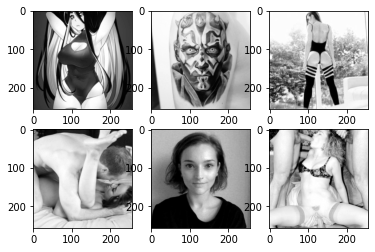

In [26]:
 examples = iter(test_loader1)
 example_data, example_targets = examples.next()
 for i in range(6):
     plt.subplot(2,3,i+1)
     plt.imshow(example_data[i][0], cmap='gray')
 plt.show() 

In [27]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size,hidden_size)
        self.relu = nn.ReLU()
        self.l4 = nn.Linear(hidden_size,num_classes) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        # no activation and no softmax at the end
        return out

model1 = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [28]:
# Loss and optimizer
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)

In [29]:
n_total_steps = len(train_loader1)
print(n_total_steps)

313


In [30]:
# Train the model
n_total_steps = len(train_loader1)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader1):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model1(images)
        loss = criterion1(outputs, labels)

        # Backward and optimize
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/15], Step [100/313], Loss: 0.5015
Epoch [1/15], Step [200/313], Loss: 0.3851
Epoch [1/15], Step [300/313], Loss: 0.4709
Epoch [2/15], Step [100/313], Loss: 0.4585
Epoch [2/15], Step [200/313], Loss: 0.4401
Epoch [2/15], Step [300/313], Loss: 0.6398
Epoch [3/15], Step [100/313], Loss: 0.4349
Epoch [3/15], Step [200/313], Loss: 0.5187
Epoch [3/15], Step [300/313], Loss: 0.5304
Epoch [4/15], Step [100/313], Loss: 0.4348
Epoch [4/15], Step [200/313], Loss: 0.4662
Epoch [4/15], Step [300/313], Loss: 0.6109
Epoch [5/15], Step [100/313], Loss: 0.4015
Epoch [5/15], Step [200/313], Loss: 0.4789
Epoch [5/15], Step [300/313], Loss: 0.5290
Epoch [6/15], Step [100/313], Loss: 0.3965
Epoch [6/15], Step [200/313], Loss: 0.4506
Epoch [6/15], Step [300/313], Loss: 0.4524
Epoch [7/15], Step [100/313], Loss: 0.3868
Epoch [7/15], Step [200/313], Loss: 0.5301
Epoch [7/15], Step [300/313], Loss: 0.6893
Epoch [8/15], Step [100/313], Loss: 0.4365
Epoch [8/15], Step [200/313], Loss: 0.5993
Epoch [8/15

In [31]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader1:
        images = images.reshape(-1, 256*256*3).to(device)
        labels = labels.to(device)
        outputs = model1(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on test images: {acc} %')

Accuracy of the network on test images: 74.9 %
